生鮮野菜の価格予測（Nishika）

2022/8/8締切

# データの読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [5]:
pd.read_excel('data_explanation.xlsx', sheet_name=0)

,ファイル名,内容
0,train.csv,訓練用データ
1,test.csv,評価用データ
2,weather.csv,天候データ
3,sample_submission.csv,投稿データフォーマット


In [6]:
pd.read_excel('data_explanation.xlsx', sheet_name=1)

,ファイル名,カラム名,内容
0,train.csv,kind,野菜の種類
1,NaN,date,日付
2,NaN,amount,卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3,NaN,mode_price,卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
5,test.csv,kind,野菜の種類
6,NaN,date,日付
7,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
8,weather.csv,date,日付
9,NaN,mean_temp,平均気温（℃）


In [7]:
import openpyxl
data_exp = openpyxl.load_workbook('data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [8]:
data_exp[data_exp.sheetnames[0]]

<Worksheet "データ説明">

In [9]:
train_raw = pd.read_csv('train.csv')
train_raw

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [10]:
test_raw = pd.read_csv('test.csv')
test_raw

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [11]:
weather_raw = pd.read_csv('weather.csv')
weather_raw

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [12]:
sub_raw = pd.read_csv('sample_submission.csv')
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [13]:
train_raw.isnull().sum()

kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64

In [14]:
train_raw.describe(include='all')

,kind,date,amount,mode_price,area
count,97782,9.778200e+04,97782.000000,97782.000000,97782
unique,44,NaN,NaN,NaN,266
top,トマト,NaN,NaN,NaN,北海道
freq,4379,NaN,NaN,NaN,5410
mean,NaN,2.013619e+07,87095.257246,1341.207081,NaN
std,NaN,4.726274e+04,84438.195701,1304.031597,NaN
min,NaN,2.005111e+07,1.000000,18.500000,NaN
25%,NaN,2.009123e+07,21664.250000,227.000000,NaN
50%,NaN,2.014012e+07,58335.500000,1242.000000,NaN
75%,NaN,2.018020e+07,128100.750000,1890.000000,NaN


In [15]:
train_raw['kind'].unique()

array(['だいこん', 'かぶ', 'にんじん', 'ごぼう', 'れんこん', 'キャベツ', 'レタス', 'はくさい', 'こまつな',
       'ほうれんそう', 'ねぎ', 'しゅんぎく', 'ブロッコリー', 'きゅうり', 'かぼちゃ', 'なす', 'トマト',
       'ピーマン', 'じゃがいも', 'さつまいも', 'さといも', 'たまねぎ', 'なましいたけ', 'セルリー',
       'さやえんどう', 'なのはな', 'たけのこ', 'ふき', 'うど', 'そらまめ', 'アスパラガス', 'ピース',
       'とうもろこし', 'いんげん', 'えだまめ', 'うめ', 'まつたけ', 'オクラ', 'レイシにがうり', 'みずな',
       'ミニトマト', 'にら', 'えのきだけ', 'しめじ'], dtype=object)

In [16]:
len(train_raw['kind'].unique())

44

In [17]:
test_raw['kind'].unique()

array(['だいこん', 'にんじん', 'キャベツ', 'レタス', 'はくさい', 'こまつな', 'ほうれんそう', 'ねぎ',
       'きゅうり', 'トマト', 'ピーマン', 'じゃがいも', 'なましいたけ', 'セルリー', 'そらまめ', 'ミニトマト'],
      dtype=object)

In [18]:
len(test_raw['kind'].unique())

16

In [19]:
len(sub_raw['kind'].unique())

16

In [20]:
# trainのデータをtest['kind']にある種類のみに絞ろうとするができず…

# EDA

In [21]:
train = train_raw.copy()
test = test_raw.copy()
weather = weather_raw.copy()
sub = sub_raw.copy()

## trainデータ

### dateをdatetime型に変換

In [22]:
train['date'] = train['date'].astype(str)

In [23]:
train['date'] = pd.to_datetime(train['date'])

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kind        97782 non-null  object        
 1   date        97782 non-null  datetime64[ns]
 2   amount      97782 non-null  int64         
 3   mode_price  97782 non-null  float64       
 4   area        97782 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [25]:
train.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_17032\4198708820.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include='all')


,kind,date,amount,mode_price,area
count,97782,97782,97782.000000,97782.000000,97782
unique,44,4379,NaN,NaN,266
top,トマト,2017-05-31 00:00:00,NaN,NaN,北海道
freq,4379,28,NaN,NaN,5410
first,NaN,2005-11-07 00:00:00,NaN,NaN,NaN
last,NaN,2022-04-30 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,87095.257246,1341.207081,NaN
std,NaN,NaN,84438.195701,1304.031597,NaN
min,NaN,NaN,1.000000,18.500000,NaN
25%,NaN,NaN,21664.250000,227.000000,NaN


### 各野菜の卸売価格（中央値）推移

In [26]:
train = train.set_index('date')

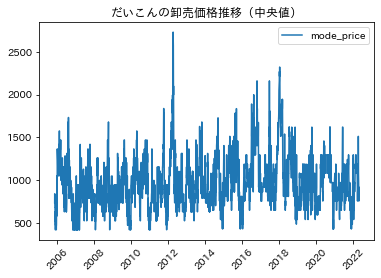

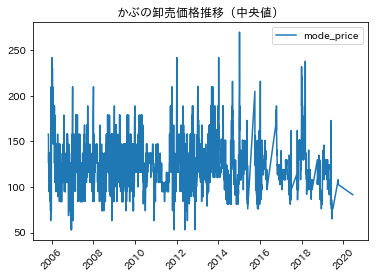

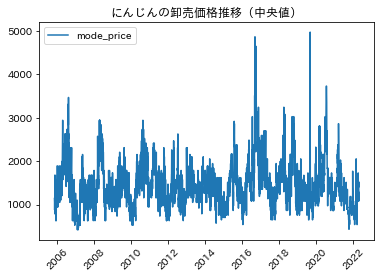

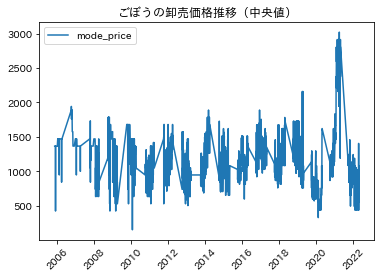

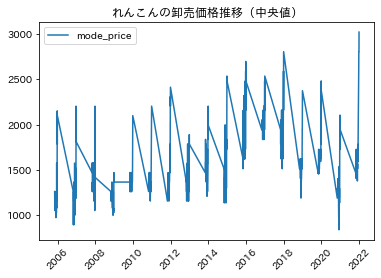

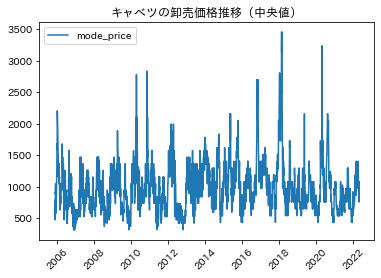

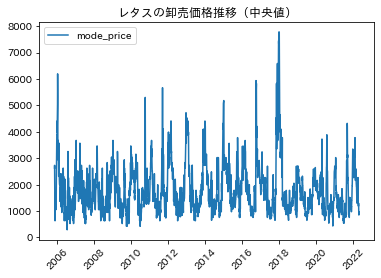

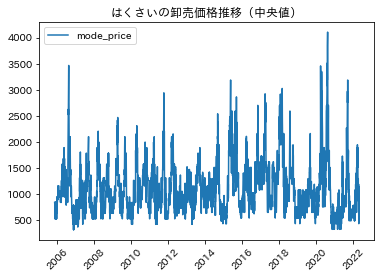

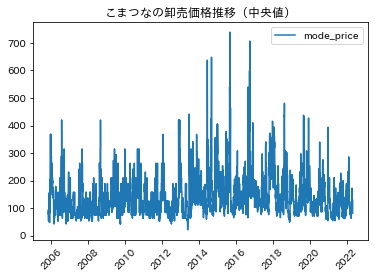

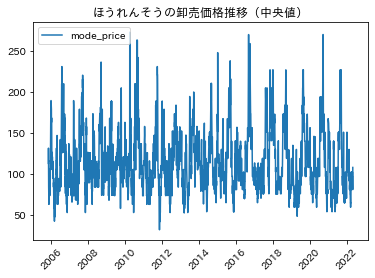

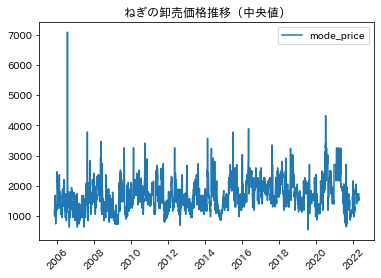

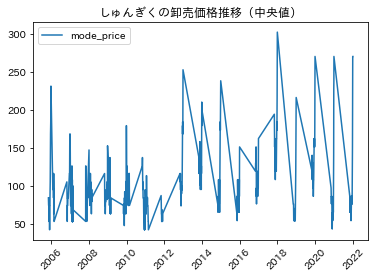

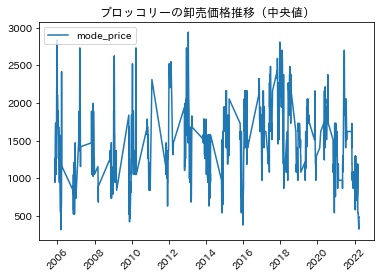

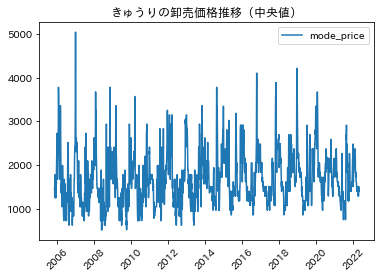

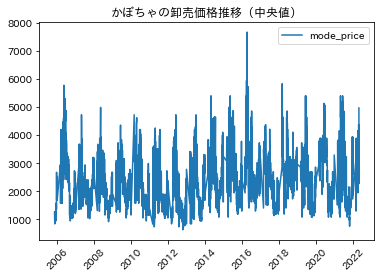

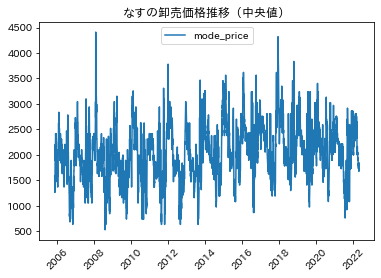

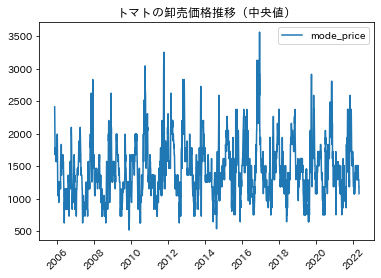

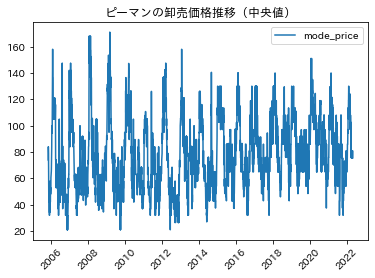

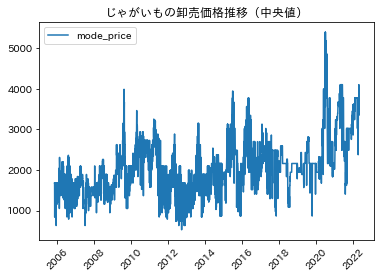

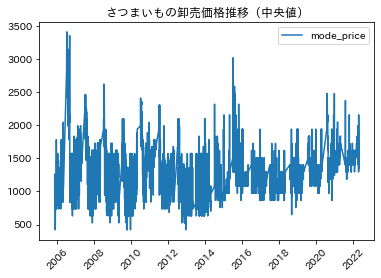

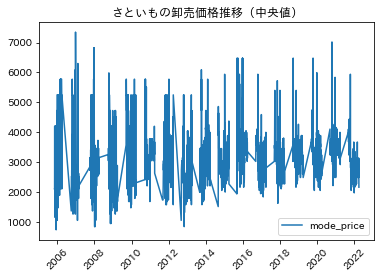

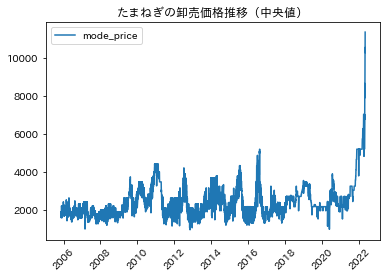

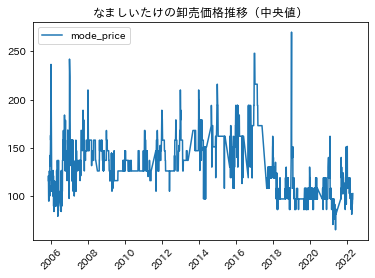

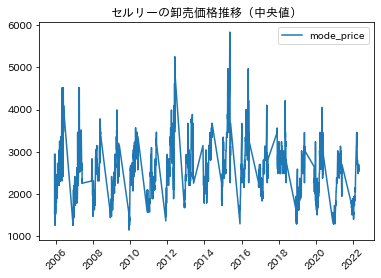

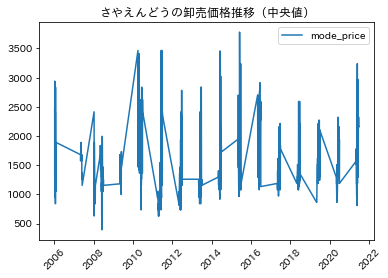

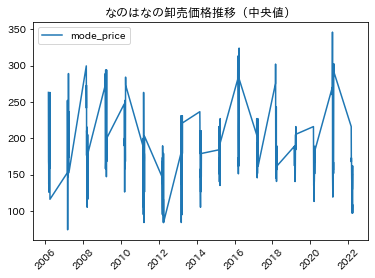

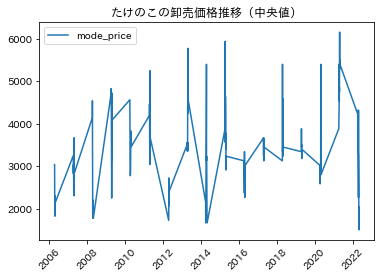

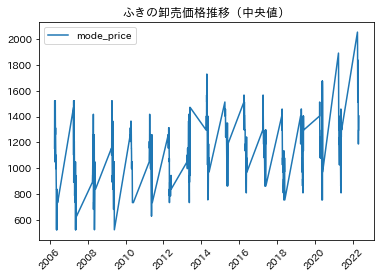

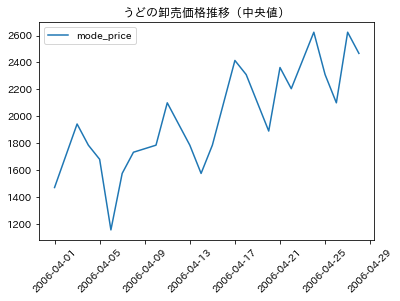

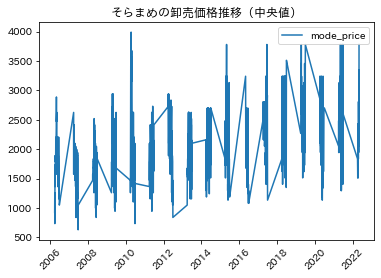

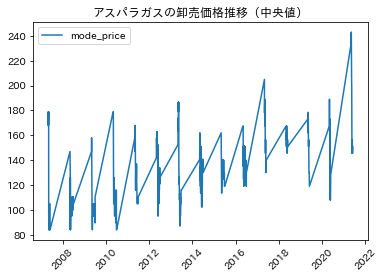

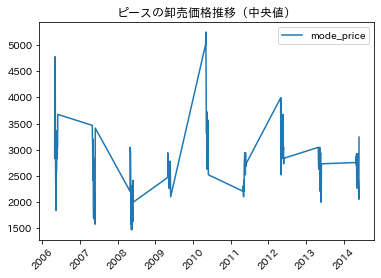

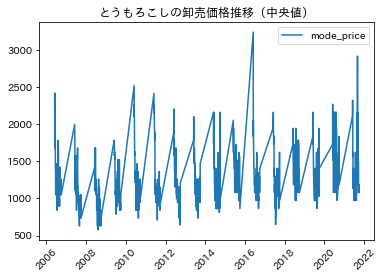

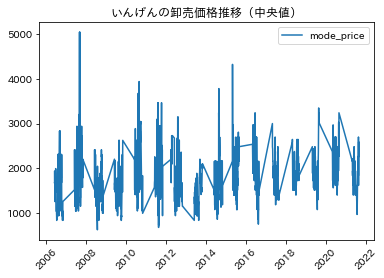

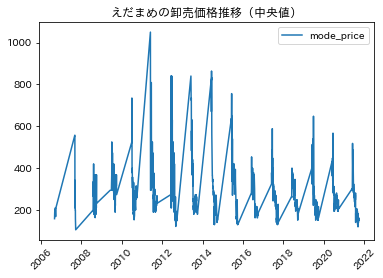

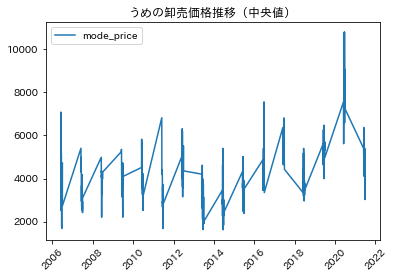

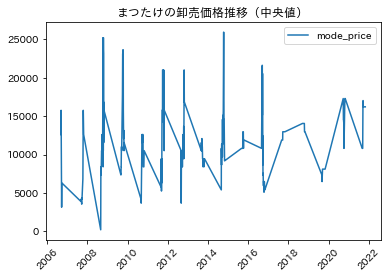

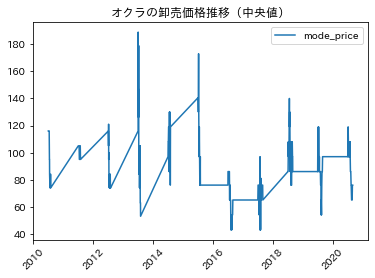

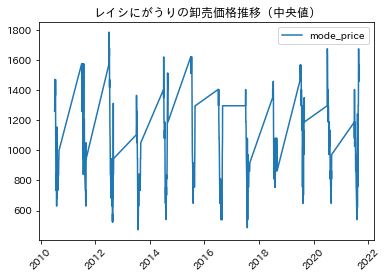

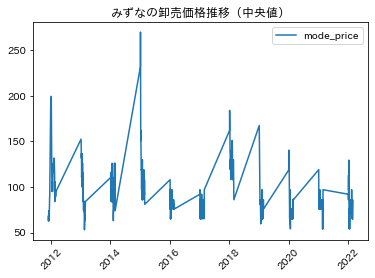

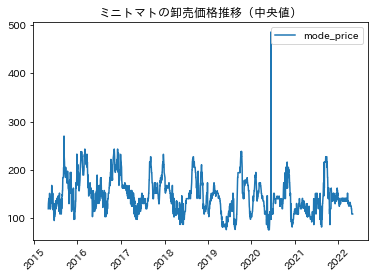

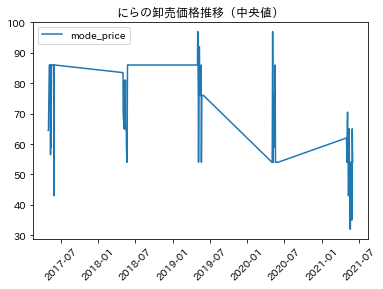

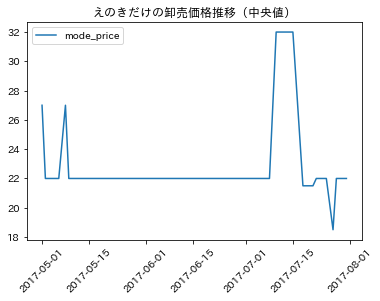

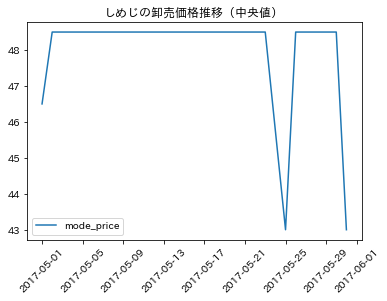

In [27]:
for name in train['kind'].unique():
    train_kind = train[train['kind']==name]
    plt.figure()
    plt.plot(train_kind[['mode_price']])
    plt.title(f'{name}の卸売価格推移（中央値）')
    plt.xticks(rotation=45)
    plt.legend(['mode_price'])
    
    plt.show()

### 各野菜の卸売数量（合計）推移

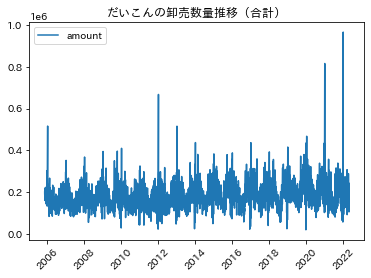

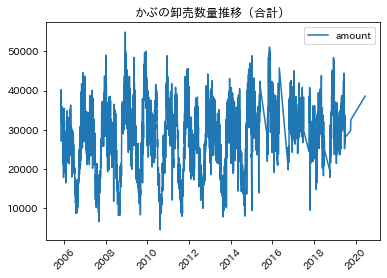

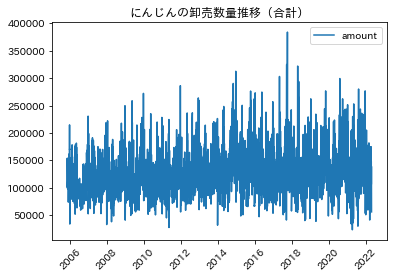

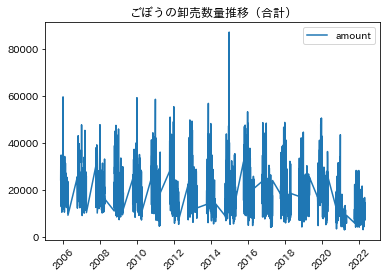

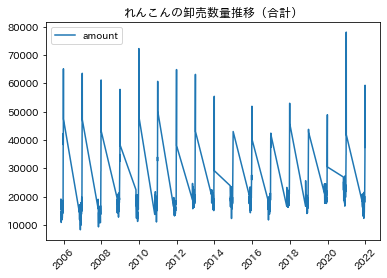

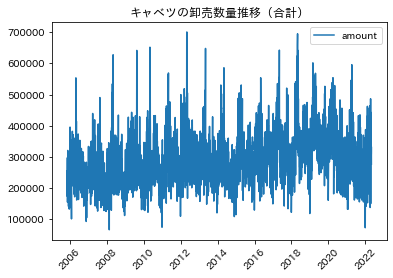

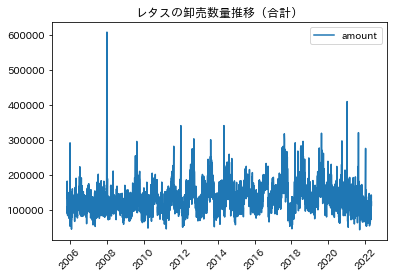

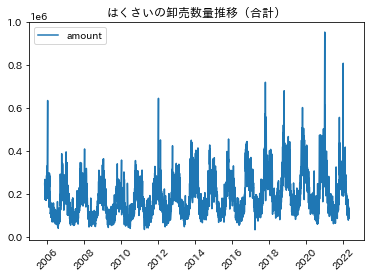

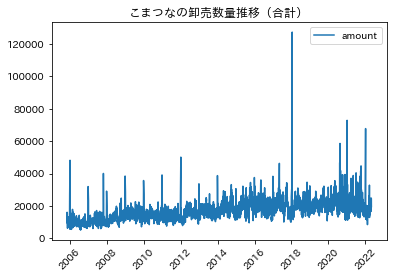

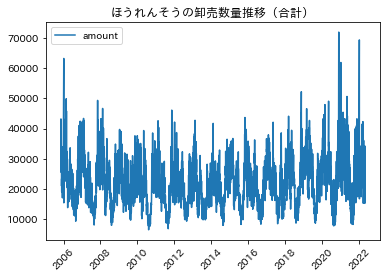

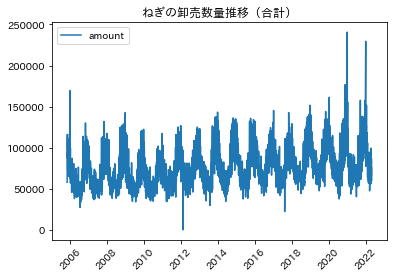

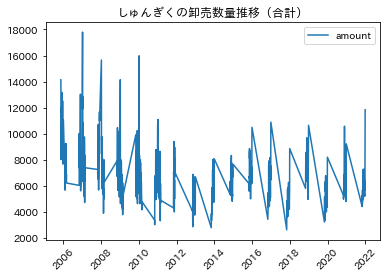

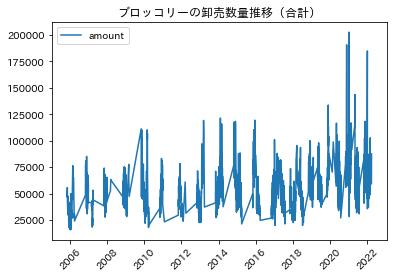

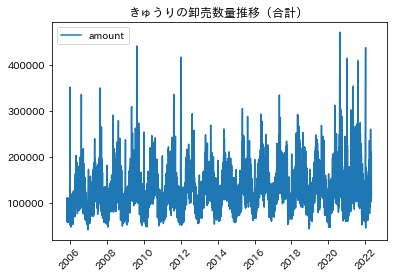

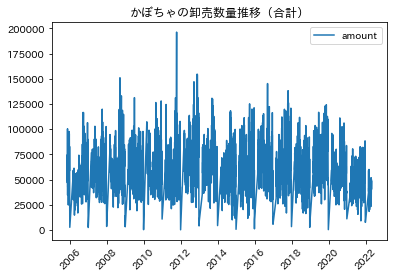

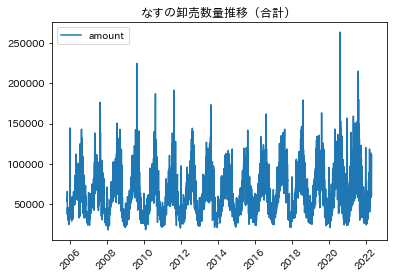

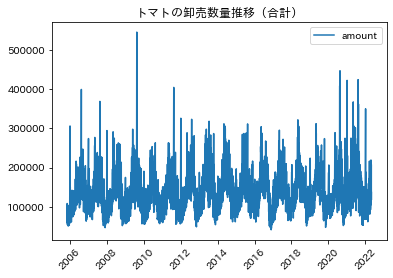

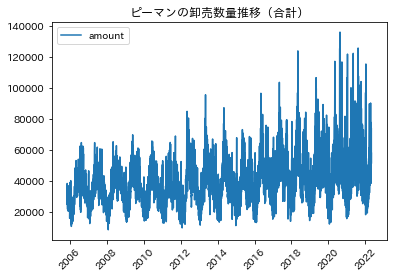

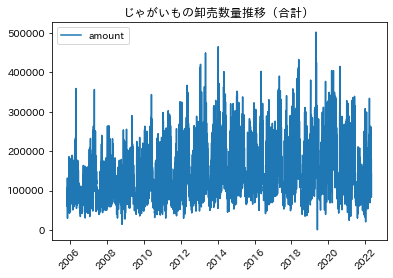

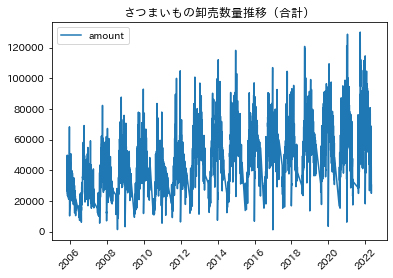

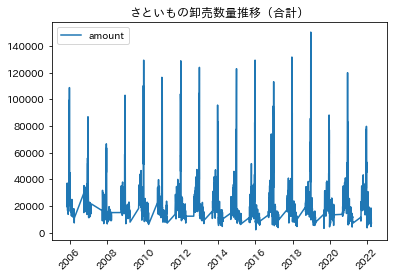

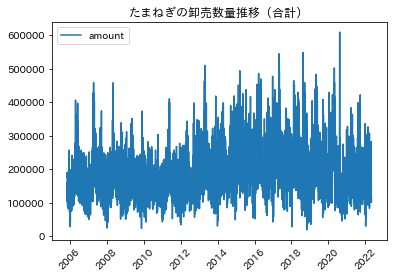

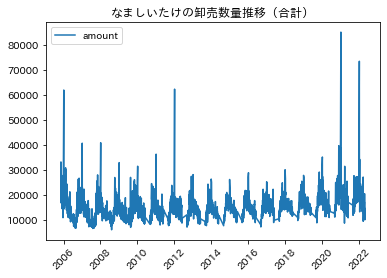

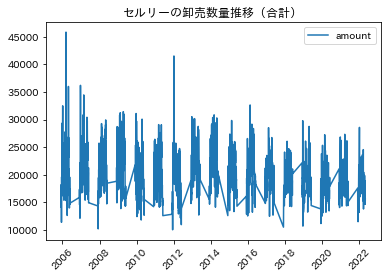

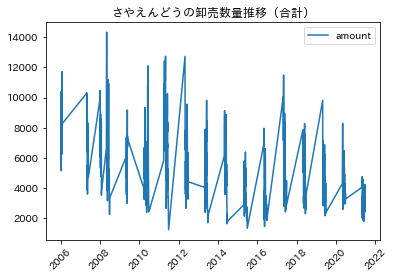

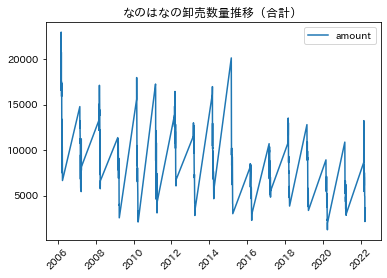

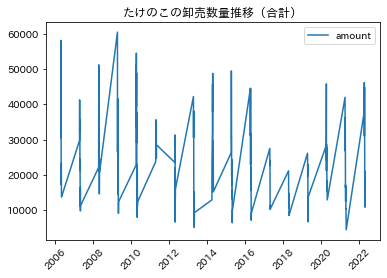

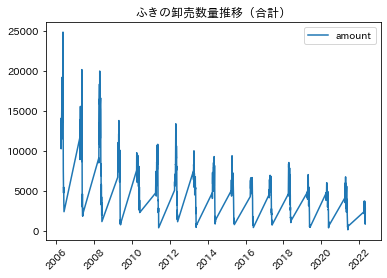

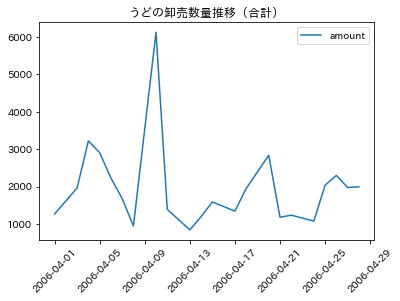

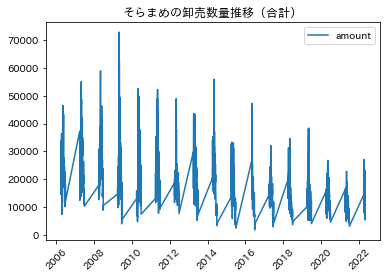

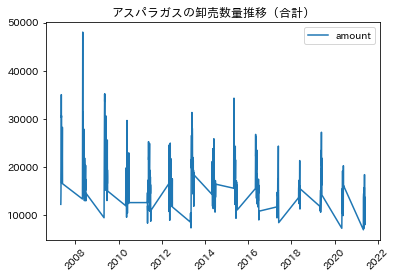

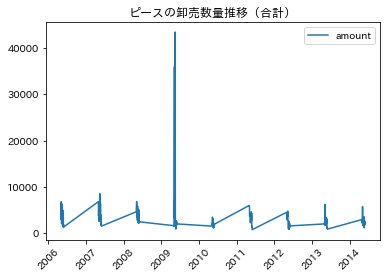

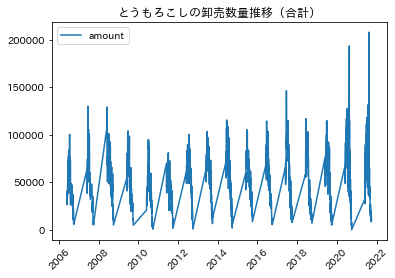

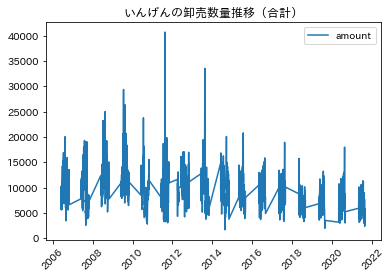

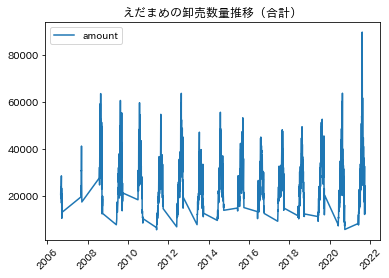

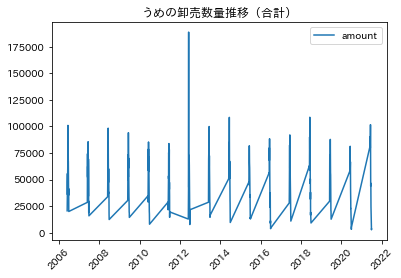

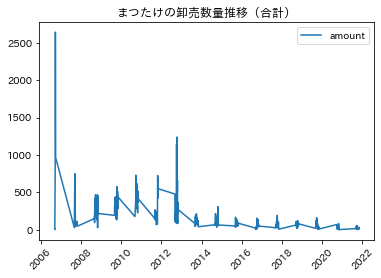

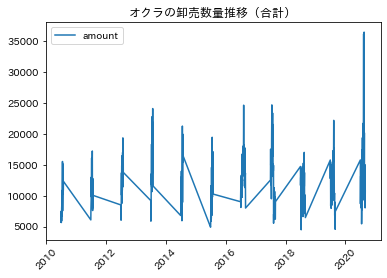

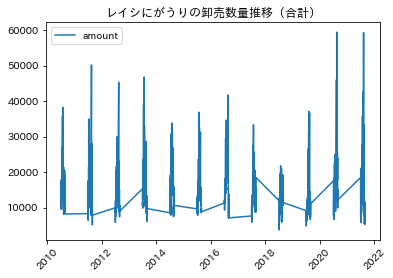

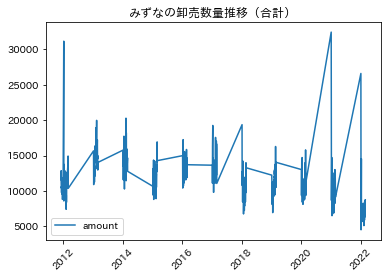

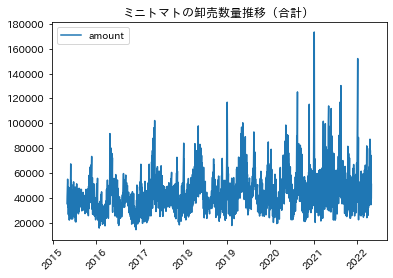

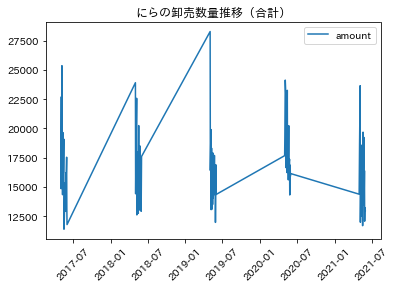

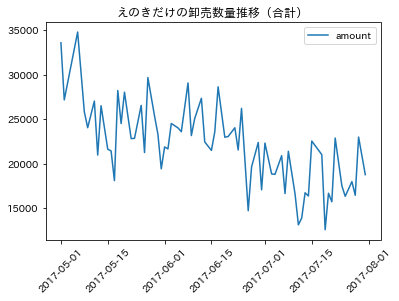

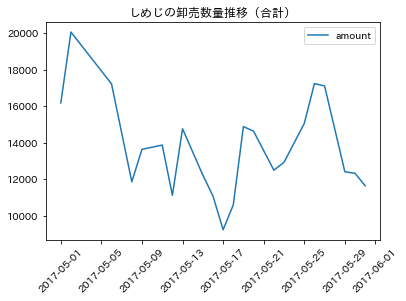

In [28]:
for name in train['kind'].unique():
    train_kind = train[train['kind']==name]
    plt.figure()
    plt.plot(train_kind[['amount']])
    plt.title(f'{name}の卸売数量推移（合計）')
    plt.xticks(rotation=45)
    plt.legend(['amount'])
    
    plt.show()

### 産地ランキング

In [29]:
train_area = train.copy()
train_area['area'] = train['area'] + '_'

In [30]:
# 「各地」を完全に消すことができない…
# train['area'] = train['area'].str.strip('各地')

In [31]:
train_area_all = train_area['area'].sum()

In [32]:
train_area_all = train_area_all.split('_')

In [33]:
import collections

In [34]:
c = collections.Counter(train_area_all)

In [35]:
area_rank20_train = pd.DataFrame(c.most_common(20),columns=['産地','出現数'])

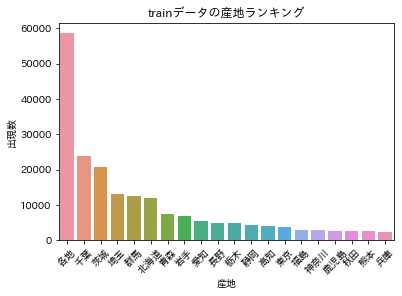

In [36]:
sns.barplot(x='産地', y='出現数', data=area_rank20_train)
plt.title('trainデータの産地ランキング')
plt.xticks(rotation=45)
plt.show()

## testデータ

### dateをdatetime型に変換

In [37]:
test['date'] = test['date'].astype(str)
test['date'] = pd.to_datetime(test['date'])
test.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_17032\2475165290.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.describe(include='all')


,kind,date,area
count,320,320,320
unique,16,20,15
top,だいこん,2022-05-02 00:00:00,千葉_各地_茨城
freq,20,16,40
first,NaN,2022-05-02 00:00:00,NaN
last,NaN,2022-05-31 00:00:00,NaN


### 産地ランキング

In [38]:
test_area = test.copy()
test_area['area'] = test['area'] + '_'

test_area_all = test_area['area'].sum()

test_area_all = test_area_all.split('_')

c = collections.Counter(test_area_all)

area_rank20_test = pd.DataFrame(c.most_common(20),columns=['産地','出現数'])

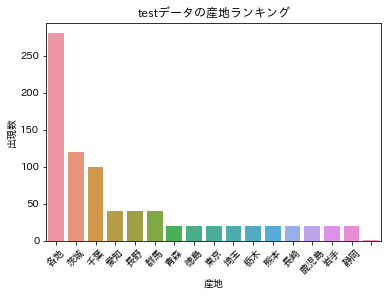

In [39]:
sns.barplot(x='産地', y='出現数', data=area_rank20_test)
plt.title('testデータの産地ランキング')
plt.xticks(rotation=45)
plt.show()

## weatherデータ

In [40]:
weather.isnull().sum()

date               0
mean_temp        367
max_temp         367
max_temp_time    367
min_temp         368
min_temp_time    368
sum_rain         369
sun_time         432
mean_humid       398
area               0
dtype: int64

### dateをdatetime型に変換

In [41]:
weather.head()

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森


In [42]:
weather['date'] = weather['date'].astype(str)
weather['date'] = pd.to_datetime(weather['date'])
weather.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_17032\12676271.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather.describe(include='all')


,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
count,204320,203953.000000,203953.000000,203953,203952.000000,203952,203951.000000,203888.000000,203922.000000,204320
unique,6385,NaN,NaN,193876,NaN,179561,NaN,NaN,NaN,32
top,2004-11-06 00:00:00,NaN,NaN,2017/9/18 0:00,NaN,2020/3/29 0:00,NaN,NaN,NaN,青森
freq,32,NaN,NaN,8,NaN,23,NaN,NaN,NaN,6385
first,2004-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.380033,19.898426,NaN,11.549927,NaN,4.420339,5.427207,69.100445,NaN
std,NaN,8.808578,8.977545,NaN,9.183661,NaN,13.573248,4.048071,13.230785,NaN
min,NaN,-16.000000,-9.000000,NaN,-24.500000,NaN,0.000000,0.000000,17.000000,NaN
25%,NaN,8.000000,12.700000,NaN,3.800000,NaN,0.000000,1.300000,60.000000,NaN


# EDAまとめ

# 仮説立て

・季節性かなり有り？

・amount少ないと価格少ない？

・産地も価格に与える影響大きい？

・amountの予測値を特徴量にしてpriceを予測？

In [43]:
train = train.reset_index()
train

,date,kind,amount,mode_price,area
0,2005-11-07,だいこん,201445,735.0,千葉
1,2005-11-08,だいこん,189660,840.0,千葉_各地_青森
2,2005-11-10,だいこん,218166,735.0,千葉_各地_青森
3,2005-11-11,だいこん,182624,682.5,千葉_青森
4,2005-11-12,だいこん,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,2017-05-26,しめじ,17231,48.5,新潟_長野
97778,2017-05-27,しめじ,17105,48.5,新潟_長野
97779,2017-05-29,しめじ,12406,48.5,新潟_長野
97780,2017-05-30,しめじ,12320,48.5,新潟_長野
